In [24]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from pyaxis import pyaxis
import matplotlib.font_manager as fm 
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [25]:
# Load the "Jost" font needed for this plot
font_dir = ['./Jost_Font/']  # Font is located in Jost_Font folder
for font in fm.findSystemFonts(font_dir):
    fm.fontManager.addfont(font)

In [26]:
gpd.options.io_engine = "pyogrio"

In [27]:
data = pd.read_csv("./NRW2023-wahlbeteiligung.csv", sep=';')

In [28]:
data_municipality = data[data["ebene_resultat"].isin(["Gemeinde"])]

In [29]:
data_municipality.head()

wahl_jahr ebene_resultat        geoLevelName  kanton_nummer  \
27       2023       Gemeinde     Aeugst am Albis            1.0   
28       2023       Gemeinde  Affoltern am Albis            1.0   
29       2023       Gemeinde          Bonstetten            1.0   
30       2023       Gemeinde     Hausen am Albis            1.0   
31       2023       Gemeinde            Hedingen            1.0   

   kanton_bezeichnung  bezirk_nummer bezirk_bezeichnung  gemeinde_nummer  \
27             Zürich          101.0   Bezirk Affoltern              1.0   
28             Zürich          101.0   Bezirk Affoltern              2.0   
29             Zürich          101.0   Bezirk Affoltern              3.0   
30             Zürich          101.0   Bezirk Affoltern              4.0   
31             Zürich          101.0   Bezirk Affoltern              5.0   

   gemeinde_bezeichnung  wahlberechtigte  leere_wahlzettel  \
27      Aeugst am Albis             1384                 1   
28   Affoltern am Albis             7280                 0   
29           Bonstetten             3638                 2   
30      Hausen am Albis             2621                 1   
31             Hedingen             2570                 0   

    ungueltige_wahlzettel  gueltige_wahlzettel  wahlbeteiligung  \
27                      5                  809        58.887283   
28                     53                 3226        45.041209   
29                     13                 1983        54.920286   
30                      0                 1379        52.651660   
31                     46                 1475        59.182879   

    letzte_wahl_wahlbeteiligung  differenz_wahlbeteiligung  \
27                    55.366027                   3.521256   
28                    42.144638                   2.896570   
29                    54.342499                   0.577787   
30                    53.409539                  -0.757879   
31                    53.976378                   5.206501   

    eingelegte_wahlzettel  
27                    815  
28                   3279  
29                   1998  
30                   1380  
31                   1521

In [30]:
data_municipality["kanton_abbr"] = data_municipality["kanton_nummer"].map({
    1: "ZH",
    2: "BE",
    3: "LU",
    4: "UR",
    5: "SZ",
    6: "OW",
    7: "NW",
    8: "GL",
    9: "ZG",
    10: "FR",
    11: "SO",
    12: "BS",
    13: "BL",
    14: "SH",
    15: "AR",
    16: "AI",
    17: "SG",
    18: "GR",
    19: "AG",
    20: "TG",
    21: "TI",
    22: "VD",
    23: "VS",
    24: "NE",
    25: "GE",
    26: "JU",
})

C:\Users\z00433wm\AppData\Local\Temp\ipykernel_23296\1805041338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_municipality["kanton_abbr"] = data_municipality["kanton_nummer"].map({


In [31]:
border_layout_folder = Path("./boundaries")
municipality_border = border_layout_folder / "k4g23.shx"
canton_border = border_layout_folder / "k4k23.shx"

In [32]:
map_canton = gpd.read_file(str(canton_border))
map_municipality = gpd.read_file(str(municipality_border))

In [33]:
map_municipality.head()

GMDHISTID  GMDNR             GMDNAME  BZHISTID  BZNR  KTNR  GRNR  AREA_HA  \
0      13256      1     Aeugst am Albis     10053   101     1     4      791   
1      11742      2  Affoltern am Albis     10053   101     1     4     1059   
2      11801      3          Bonstetten     10053   101     1     4      743   
3      11992      4     Hausen am Albis     10053   101     1     4     1360   
4      12249      5            Hedingen     10053   101     1     4      653   

     E_MIN    E_MAX    N_MIN    N_MAX   E_CNTR   N_CNTR  Z_MIN  Z_MAX  Z_AVG  \
0  2678111  2681155  1234561  1238544  2679300  1235700    533    887    685   
1  2673826  2678584  1235208  1239338  2676800  1236800    440    749    529   
2  2675745  2679642  1238997  1243159  2677800  1241000    502    715    581   
3  2680394  2686463  1230185  1236411  2682900  1233100    524    915    673   
4  2674866  2678972  1238053  1241034  2676400  1239000    475    745    560   

   Z_MED  Z_CNTR                                           geometry  
0    673     700  POLYGON ((2678565.000 1238072.000, 2679757.000...  
1    502     490  POLYGON ((2673825.000 1238520.000, 2674860.000...  
2    583     544  POLYGON ((2676430.000 1242972.000, 2676837.000...  
3    653     610  POLYGON ((2680610.000 1236347.000, 2683002.000...  
4    543     503  POLYGON ((2675427.000 1240962.000, 2675805.000...

In [34]:
map_municipality = map_municipality.rename(columns={'GMDNAME': 'gemeinde_bezeichnung'})
map_municipality = map_municipality.merge(data_municipality, on="gemeinde_bezeichnung")

In [35]:
map_municipality["voter_per_qkm2"] = map_municipality["wahlberechtigte"].astype(int) / (map_municipality["AREA_HA"].astype(float) / 100)

In [36]:
sorted_by_density = map_municipality.sort_values('voter_per_qkm2')

In [37]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list(name="my_cmap", 
                                                colors=[(0, "lavender"), (0.125, "navy"), (1, "crimson")])
cmap.set_over('red')

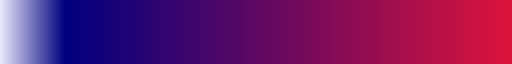

In [38]:
cmap


In [39]:
legend_elements_negative = [
       Patch(facecolor='#900303', label='> 16%'),
       Patch(facecolor='#c44a4a', label='8—16%'),
       Patch(facecolor='#eebdbd', label='0—8%'),
]

legend_elements_positive = [
       Patch(facecolor='#006311', label='> 16%'),
       Patch(facecolor='#02b639', label='8—16%'),
       Patch(facecolor='#a8eaaf', label='0—8%'),
]

legend_kwargs = {
       'prop': {'family': 'Jost', 'size': 18, 'weight': 'regular'}, 
       'labelcolor': 'dimgrey', 
       'framealpha': 0, 
       'labelspacing': 0.1, 
       'handlelength': 1.5, 
       'handleheight': 1, 
       'handletextpad': 0.4,
}

arrowprops = {
       'arrowstyle': 'Simple',
       'edgecolor': 'white',
       'facecolor': 'black',
       'linewidth': 1.5,
}


In [40]:
highest = sorted_by_density.tail(1)
lowest = sorted_by_density.head(1)
median = None

annotation_items = {
    # f'{highest["gemeinde_bezeichnung"].values[0]}, {highest["kanton_abbr"].values[0]}': [highest, (0.55, 0.1)],
    # f'{lowest_overall["gemeinde_bezeichnung"].values[0]}, {lowest_overall["kanton_abbr"].values[0]}': [lowest_overall, (0.9, 0.9)],
    # f'{lowest_without_ai["gemeinde_bezeichnung"].values[0]}, {lowest_without_ai["kanton_abbr"].values[0]}': [lowest_without_ai, (0.1, 0.85)]
}

In [41]:
def do_annotations(axis):
    for key, item in annotation_items.items():
        axis.annotate(
            key,
            xy=(item[0]['geometry'].centroid.x, item[0]['geometry'].centroid.y), xycoords='data',
            xytext=item[1], textcoords='axes fraction',
            size=30, va="center", ha="center",
            arrowprops={'connectionstyle': "arc3,rad=-0.2", **arrowprops},
            fontproperties={'family': 'Jost', 'size': 27, 'weight': 'semibold'}
        )
        
        text_x = item[1][0]
        text_y = item[1][1]
        text_y = text_y + 0.025 if text_y >= 0.5 else text_y - 0.025
        municipality_participation = item[0]['wahlbeteiligung'].values[0]
        participation_difference = municipality_participation
        color = '#006311' if participation_difference >= 0 else '#900303'
        axis.text(text_x - 0.02, text_y, f"{municipality_participation:.1f}%", fontproperties={'family': 'Jost', 'size': 20, 'weight': 'regular'}, horizontalalignment='center', verticalalignment='center', transform=axis.transAxes)
        axis.text(text_x + 0.02, text_y, f"({'+' if participation_difference >= 0 else '–'}{abs(municipality_participation):.1f}%)", color=color, fontproperties={'family': 'Jost', 'size': 20, 'weight': 'semibold'}, horizontalalignment='center', verticalalignment='center', transform=axis.transAxes)

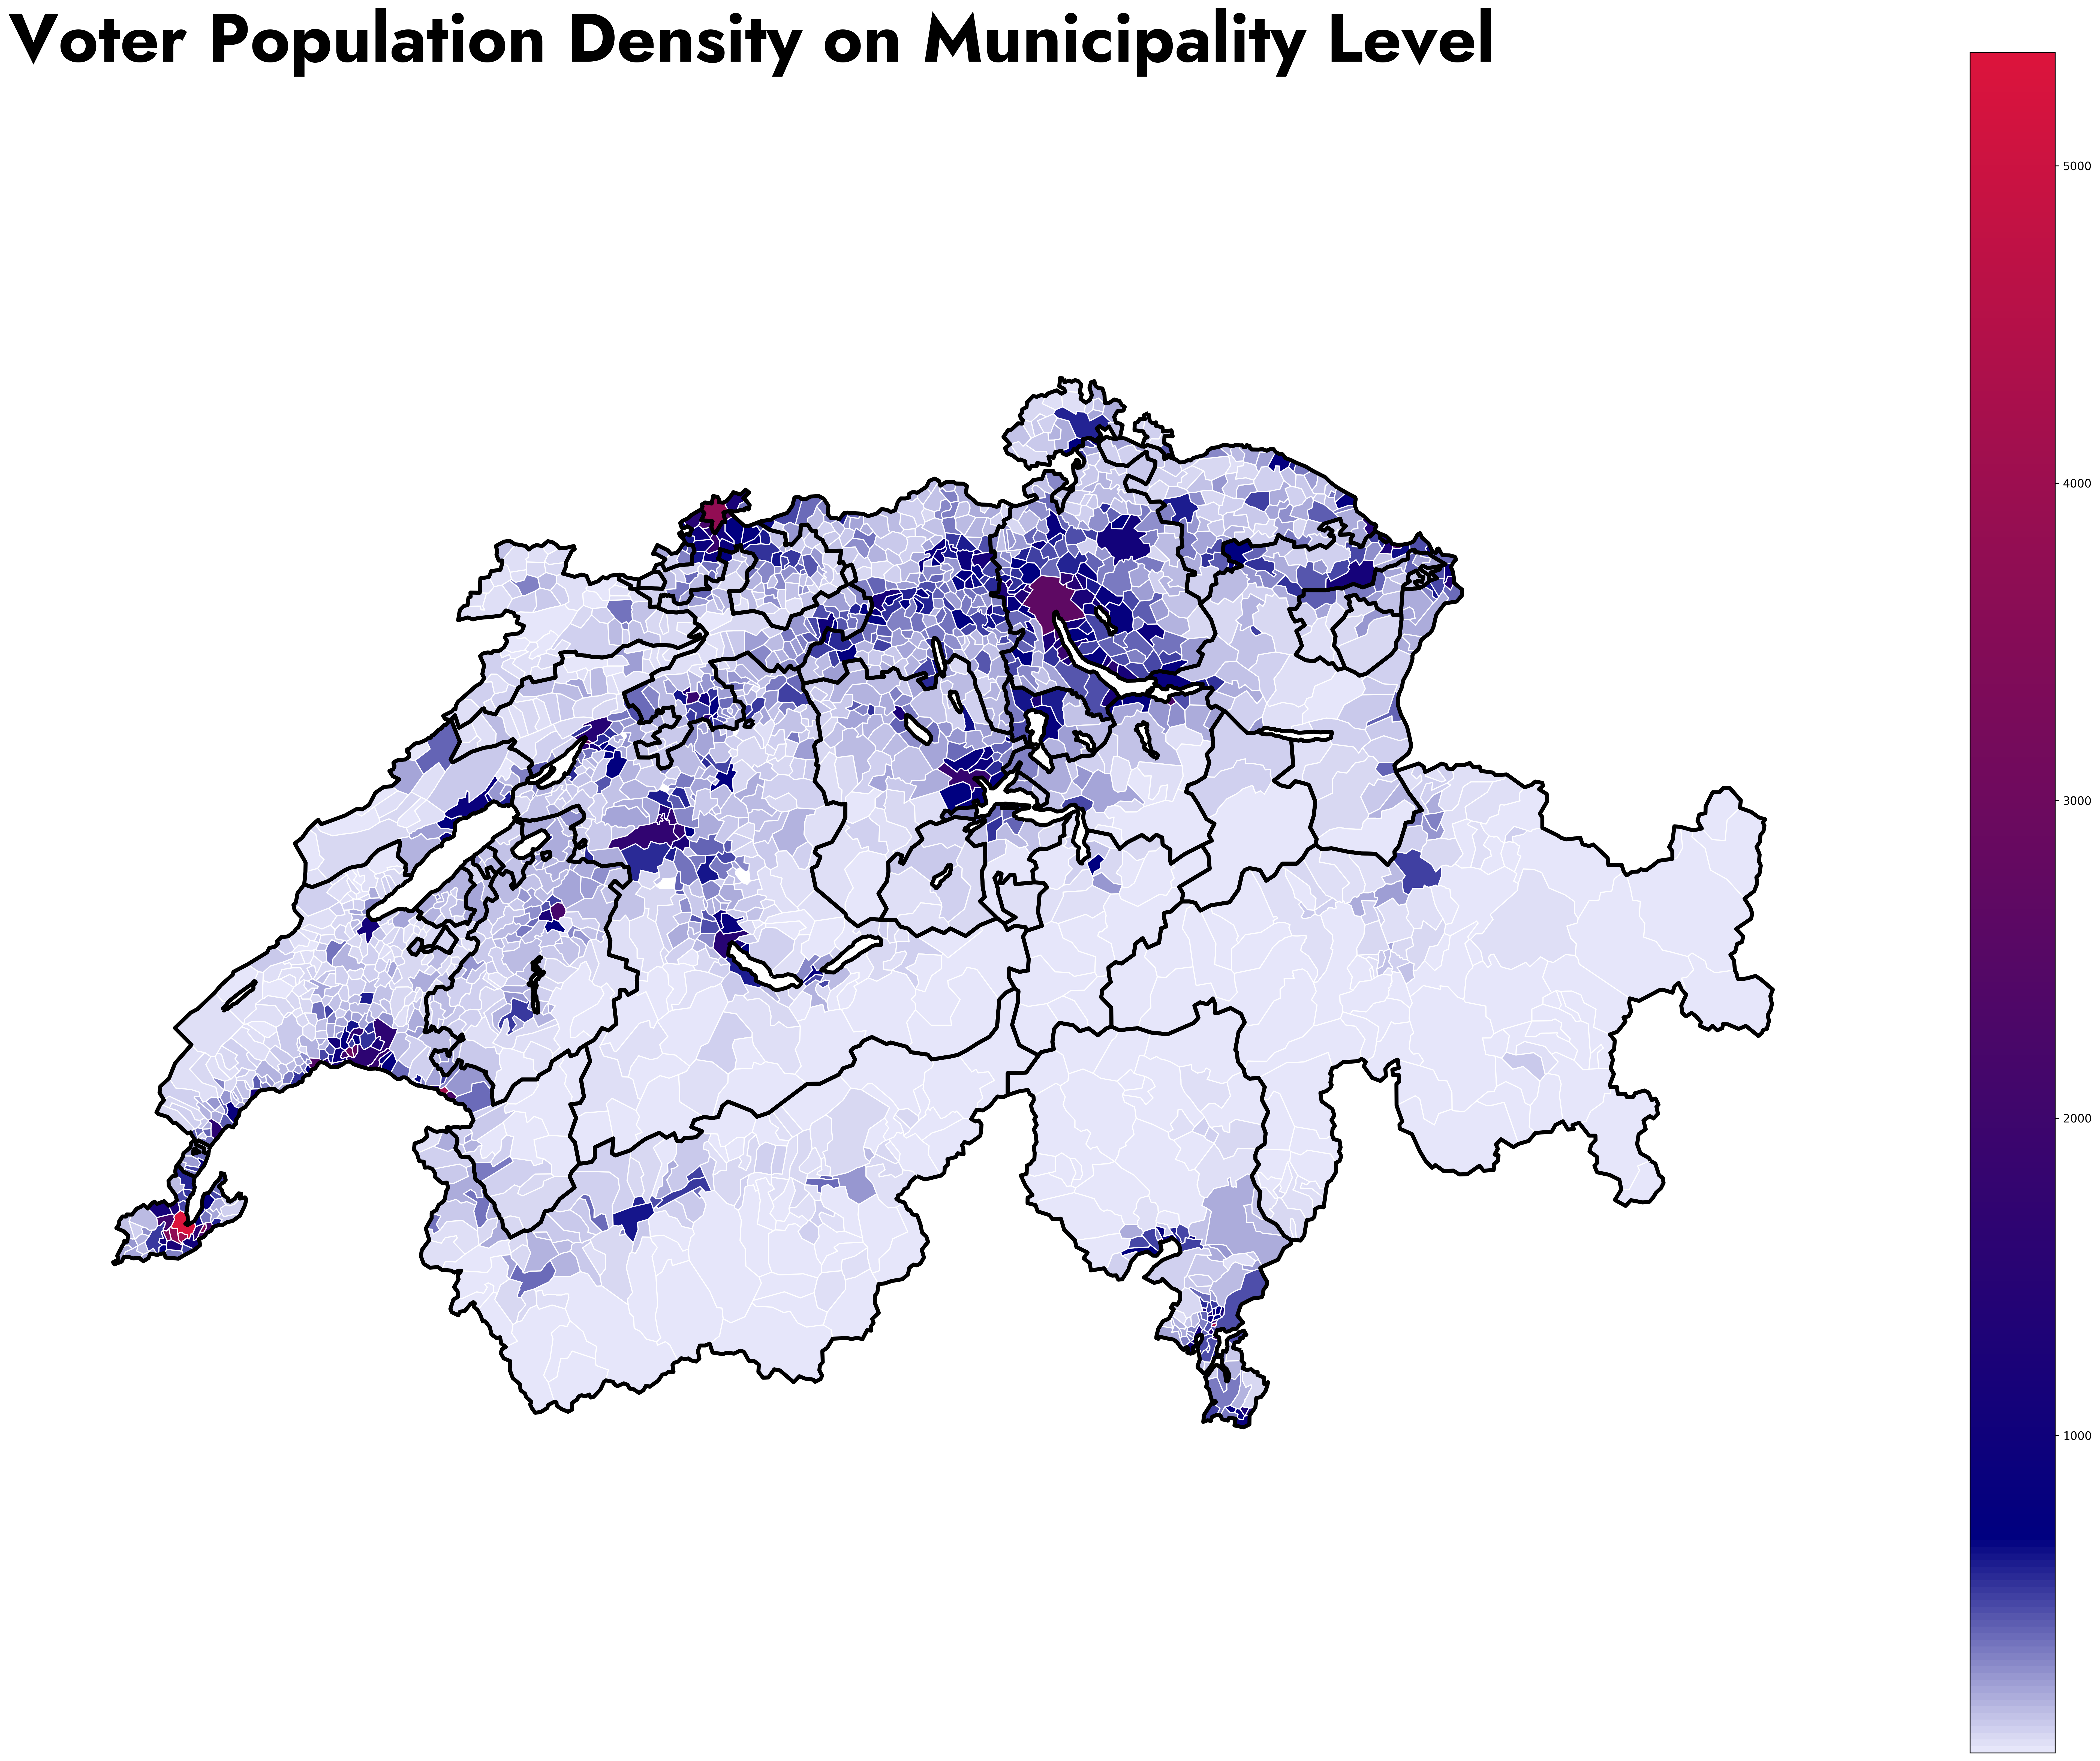

In [42]:
# Create figure and axis
f, ax = plt.subplots(figsize=(36, 27), dpi=300)
p = map_municipality.plot(column="voter_per_qkm2", ax=ax, linewidth=1, edgecolor='white', cmap=cmap, legend=True)#, vmin=avg_participation - 24, vmax= avg_participation + 24)
map_canton.plot(ax=ax, linewidth=3.5, edgecolor='black', color=(0, 0, 0, 0))

ax.tick_params(which='both', bottom=False, top=False, right=False, left=False, labelleft=False, labelbottom=False) 

ax.spines.bottom.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.right.set_visible(False)

do_annotations(ax)

# f.legend(handles=legend_elements_negative, bbox_to_anchor=(0.3205, 0.85), **legend_kwargs)
# f.legend(handles=legend_elements_positive, bbox_to_anchor=(0.2605, 0.85), **legend_kwargs)

# Set title
f.suptitle('Voter Population Density on Municipality Level', fontproperties={'family': 'Jost', 'size': 60, 'weight': 'bold'}, x=0.37, y=0.9)

# Set subtitle (there might be a better way, but I could not find a way to have differently colored text in one object...)
# f.text(x=0.157, y=0.85, s=f"Difference —              and               — in voter participation, compared to the", 
#        color='dimgrey', fontproperties={'family': 'Jost', 'size': 27, 'weight': 'regular'})
# f.text(x=0.2181, y=0.85, s="positive", color='#006311', fontproperties={'family': 'Jost', 'size': 27, 'weight': 'semibold'})
# f.text(x=0.2782, y=0.85, s="negative", color='#900303', fontproperties={'family': 'Jost', 'size': 27, 'weight': 'semibold'})
# f.text(x=0.508, y=0.85, s=f"Swiss average of {avg_participation:.1f}%", color='black', fontproperties={'family': 'Jost', 'size': 27, 'weight': 'semibold'})

# Save the figure -> the output "plot.png" looks a lot closer to the original than the one displayed in this notebook
plt.savefig('population_density_municipality.png', bbox_inches='tight', pad_inches=0.5)